# ROI(Region of Interest)

In [1]:
import cv2
import numpy as np

img=cv2.imread('./img/sunset.jpg')

x=320
y=150
w=50
h=50

roi=img[y:y+h,x:x+w]
print(roi.shape)
cv2.rectangle(roi,(0,0),(h-1,w-1),(0,255,0))
cv2.imshow("img",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


In [3]:
import cv2
import numpy as np

img=cv2.imread('./img/sunset.jpg')

x=320
y=150
w=50
h=50

roi=img[y:y+h,x:x+w]
img2=roi.copy()
img[y:y+h,x:x+w]=roi
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0))
cv2.imshow("img",img)
cv2.imshow('roi',img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 마우스로 관심영역 지정

In [6]:
import cv2
import numpy as np

isDragging=False
x0,y0,w,h=-1,-1,-1,-1
blue,red=(255,0,0),(0,0,255)

def onMouse(event,x,y,flags,param):
    global isDragging,x0,y0,img
    if event==cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽버튼 = 드래그 시작
        isDragging=True
        x0=x
        y0=y
    elif event==cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw=img.copy()
            cv2.rectangle(img_draw,(x0,y0),(x,y),blue,2)
            cv2.imshow('img',img_draw)
    elif event==cv2.EVENT_LBUTTONUP: #드래그 중지
        if isDragging:
            isDragging=False
            w=x-x0
            h=y-y0
            print("x:%d, y:%d, w:%d, h:%d"%(x0,y0,w,h))
            if w>0 and h>0:
                img_draw=img.copy()
                cv2.rectangle(img_draw,(x0,y0),(x,y),red,2)
                cv2.imshow('img',img_draw)
                roi=img[y0:y0+h,x0:x0+w]
                cv2.imshow('cropped',roi)
                cv2.moveWindow('cropped',0,0)
                cv2.imwrite('./cropped.jpg',roi)
                print("cropped")
    else:
        cv2.imshow('img',img)
        print("좌측 상단에서 우측 하단으로 영역을 드래그하세요")

img=cv2.imread('./img/sunset.jpg')
cv2.imshow('img',img)
cv2.setMouseCallback('img',onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

        

x:448, y:144, w:112, h:86
cropped


In [8]:
import cv2
import numpy as np

img=cv2.imread('./img/sunset.jpg')

x,y,w,h=cv2.selectROI('img',img,False)
if w and h:
    roi=img[y:y+h,x:x+w]
    cv2.imshow('cropped',roi)
    cv2.moveWindow('cropped',0,0)
    cv2.imwrite('./cropped2.jpg',roi)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 지정 후 'Spacebar' 클릭시 ROI좌표 지정
# 'C'를 클릭시 ROI좌표 취소

# Color Space

### RGB,BGR,RGBA

In [2]:
import cv2
import numpy as np

img=cv2.imread('./img/opencv_logo.png')
bgr=cv2.imread('./img/opencv_logo.png',cv2.IMREAD_COLOR)
bgra=cv2.imread('./img/opencv_logo.png',cv2.IMREAD_UNCHANGED)

print("Default:",img.shape,'BGR:',bgr.shape,'BGRA:',bgra.shape)

cv2.imshow('bgr',bgr)
cv2.imshow('bgra',bgra)
cv2.imshow('alpha',bgra[:,:,3]) # 알파 채널
cv2.waitKey(0)
cv2.destroyAllWindows()


Default: (120, 98, 3) BGR: (120, 98, 3) BGRA: (120, 98, 4)


### color space convert

In [1]:
import cv2
import numpy as np

img=cv2.imread('./img/girl.jpg')
img2=img.astype(np.uint16)
b,g,r=cv2.split(img2) # 채널별 분리 == >  b,g,r= img2[:,:,0],img2[:,:,1],img2[:,:,2]
gray1=((b+g+r)/3).astype(np.uint8) # 평균으로 grayscale 구하기

gray2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #cvtColor 함수로 grayscale 구하기

cv2.imshow('original',img)
cv2.imshow('gray1',gray1)
cv2.imshow('gray2',gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### HSV,HSI,HSL

In [5]:
import cv2
import numpy as np

red_bgr=np.array([[[0,0,255]]],dtype=np.uint8)
green_bgr=np.array([[[0,255,0]]],dtype=np.uint8)
blue_bgr=np.array([[[255,0,0]]],dtype=np.uint8)
yellow_bgr=np.array([[[0,255,255]]],dtype=np.uint8)

red_hsv=cv2.cvtColor(red_bgr,cv2.COLOR_BGR2HSV)
green_hsv=cv2.cvtColor(green_bgr,cv2.COLOR_BGR2HSV)
blue_hsv=cv2.cvtColor(blue_bgr,cv2.COLOR_BGR2HSV)
yellow_hsv=cv2.cvtColor(yellow_bgr,cv2.COLOR_BGR2HSV)

print("red",red_hsv)
print("green",green_hsv)
print("blue",blue_hsv)
print("yellow",yellow_hsv)

red [[[  0 255 255]]]
green [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


### YUV,YCbCr(밝기)

In [7]:
import cv2
import numpy as np

dark=np.array([[[0,0,0]]],dtype=np.uint8)
middle=np.array([[[127,127,127]]],dtype=np.uint8)
bright=np.array([[[255,255,255]]],dtype=np.uint8)

dark_yuv=cv2.cvtColor(dark,cv2.COLOR_BGR2YUV)
middle_yuv=cv2.cvtColor(middle,cv2.COLOR_BGR2YUV)
bright_yuv=cv2.cvtColor(bright,cv2.COLOR_BGR2YUV)

print("dark",dark_yuv)
print("middle",middle_yuv)
print("bright",bright_yuv)

dark [[[  0 128 128]]]
middle [[[127 128 128]]]
bright [[[255 128 128]]]


# ThreshHolding

127.0


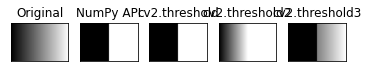

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/gray_gradient.jpg',cv2.IMREAD_GRAYSCALE)

thresh_np=np.zeros_like(img)
thresh_np[img>127]=255

ret,thresh_cv=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(ret)
ret2,thresh_cv2=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret3,thresh_cv3=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

imgs={'Original':img,'NumPy API':thresh_np,'cv2.threshold':thresh_cv,'cv2.threshold2':thresh_cv2,'cv2.threshold3':thresh_cv3}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,5,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 오츠의 알고리즘

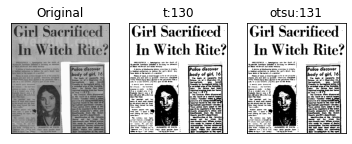

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/scaned_paper.jpg',cv2.IMREAD_GRAYSCALE)

_,t_130=cv2.threshold(img,130,255,cv2.THRESH_BINARY)

t,t_otsu=cv2.threshold(img,-1,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

imgs={'Original': img,'t:130':t_130,'otsu:%d'%t: t_otsu}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 적응형 스레시홀드

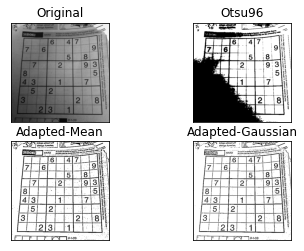

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

blk_size=9
C=5
img=cv2.imread('./img/sudoku.png',cv2.IMREAD_GRAYSCALE)

ret,th1=cv2.threshold(img,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blk_size,C)

th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blk_size,C)

imgs={'Original': img,'Otsu%d'%ret:th1,'Adapted-Mean': th2,'Adapted-Gaussian':th3}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

# 이미지 연산

### 연산

In [5]:
import cv2
import numpy as np
a=np.uint8([[200,50]])
b=np.uint8([[100,100]])

add1=a+b
sub1=a-b
multi1=a*2
div1=a/3

add2=cv2.add(a,b)
sub2=cv2.subtract(a,b)
multi2=cv2.multiply(a,2)
div2=cv2.divide(a,3)

print(add1,add2)
print(sub1,sub2)
print(multi1,multi2)
print(div1,div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [9]:
import cv2
import numpy as np

a=np.uint8([[1,2]])
b=np.uint8([[10,20]])

mask=np.uint8([[1,0]])

c1=cv2.add(a,b,None,mask)
print(c1)
c2=cv2.add(a,b,b.copy(),mask)
print(c2)
print('before:',b)
c3=cv2.add(a,b,b,mask)
print(c3)
print('after:',b)

[[11  0]]
[[11 20]]
before: [[10 20]]
[[11 20]]
after: [[11 20]]


### 알파 블렌딩(이미지의 가중치 추가)

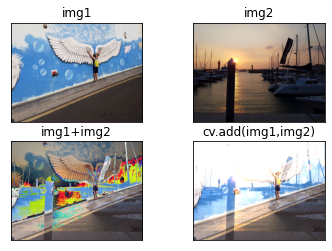

In [12]:
#단순 합성
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=cv2.imread('./img/wing_wall.jpg')
img2=cv2.imread('./img/yate.jpg')

img3=img1+img2
img4=cv2.add(img1,img2)

imgs={'img1':img1,'img2':img2,'img1+img2':img3,'cv.add(img1,img2)':img4}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
#블렌딩 50%
import cv2
import numpy as np
import matplotlib.pylab as plt

alpha=0.5
img1=cv2.imread('./img/wing_wall.jpg')
img2=cv2.imread('./img/yate.jpg')

#직접 연산
blended=img1*alpha+img2*(1-alpha)
blended=blended.astype(np.uint8)
cv2.imshow('img1*alpha + img2*(1-alpha)',blended)

# 블렌딩 함수 사용
dst=cv2.addWeighted(img1,alpha,img2,(1-alpha),0)
cv2.imshow('cv2.addWeighted',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### fade in/out 기법

In [24]:
import cv2
import numpy as np

win_name='Alpha blending'
trackbar_name='fade'

# trackbar event function
def onChange(x):
    alpha=x/1000
    dst=cv2.addWeighted(img1,1-alpha,img2,alpha,0)
    cv2.imshow(win_name,dst)
    
img1=cv2.imread('./img/man_face.jpg')
img2=cv2.imread('./img/lion_face.jpg')
cv2.imshow(win_name,img1)
cv2.createTrackbar(trackbar_name,win_name,0,1000,onChange)# trackbar function

cv2.waitKey()
cv2.destroyAllWindows()

### bit-wise 연산

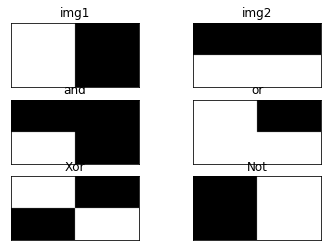

In [32]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=np.zeros((200,400),dtype=np.uint8)
img2=np.zeros((200,400),dtype=np.uint8)
img1[:,:200]=255
img2[100:200,:]=255

bitAnd=cv2.bitwise_and(img1,img2)
bitOr=cv2.bitwise_or(img1,img2)
bitXor=cv2.bitwise_xor(img1,img2)
bitNot=cv2.bitwise_not(img1)

imgs={'img1':img1,'img2':img2,'and':bitAnd,'or':bitOr,'Xor':bitXor,'Not':bitNot}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([])
    plt.yticks([])
plt.show()    

In [7]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/girl.jpg')

# make circle
mask=np.zeros_like(img)
cv2.circle(mask,(200,100),100,(255,255,255),-1)

masked=cv2.bitwise_and(img,mask)

cv2.imshow('original',img)
cv2.imshow('circle',mask)
cv2.imshow('masked',masked)

cv2.waitKey()
cv2.destroyAllWindows()

### 차영상